# Breast Cancer Prediction

dataset: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data


## Importing the libraries


In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset


In [50]:
dataset = pd.read_csv("Breast Cancer Wisconsin (Diagnostic) Data.csv")

## Dataset Analysis and Preprocessing


### Exploring dataset structure


In [51]:
dataset.shape

(569, 33)

In [52]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [53]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [54]:
dataset.isnull().values.any()  # Checking if there is any null values

True

In [55]:
dataset.isnull().values.sum()  # Total missing values

569

In [56]:
dataset.columns[dataset.isnull().any()]  # Getting the column with the missing values

Index(['Unnamed: 32'], dtype='object')

In [57]:
dataset["Unnamed: 32"].count()  # Returns the number of non-null values in the column

0

### Cleaning the dataset


In [58]:
# Removing the column containing only null values
# Removing 'id' column as it doesnot contain any predictive values
cleaned_data = dataset.drop(columns=["Unnamed: 32", "id"], axis=1)

In [59]:
cleaned_data.shape

(569, 31)

In [60]:
cleaned_data.isnull().values.any()  # Checking if there is any null values

False

In [61]:
cleaned_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Dealing with categorical values


In [62]:
cleaned_data.select_dtypes(
    include="object"
).columns  # Checking for columns with categorical values

Index(['diagnosis'], dtype='object')

In [63]:
cleaned_data["diagnosis"].unique()  # Checking the unique categories in the column

array(['M', 'B'], dtype=object)

#### Encoding categorial data (Dependent Variable)


In [64]:
processed_data = pd.get_dummies(data=cleaned_data, drop_first=True)

In [65]:
processed_data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,True
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,True
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,True
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,True
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,True


### Exploratory data analysis


#### Visualizing the distribution of the target variable


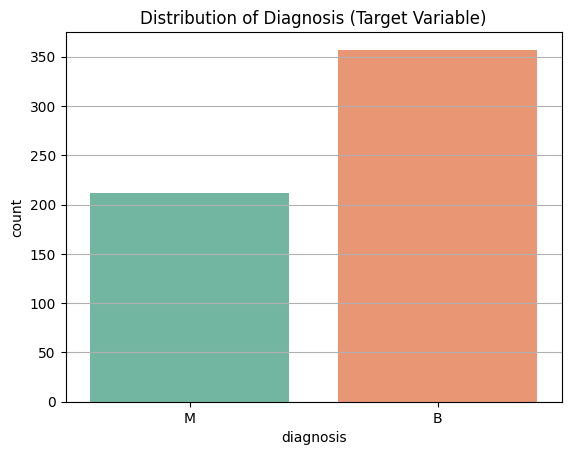

In [66]:
sns.countplot(
    x="diagnosis", data=cleaned_data, hue="diagnosis", palette="Set2", legend=False
)
plt.title("Distribution of Diagnosis (Target Variable)")
plt.grid(axis="y")
plt.show()

In [67]:
(dataset.diagnosis == "M").sum()  # Malignant(1) count

212

In [68]:
(dataset.diagnosis == "B").sum()  # Benign(0) count

357

#### Correlation heatmap of the features


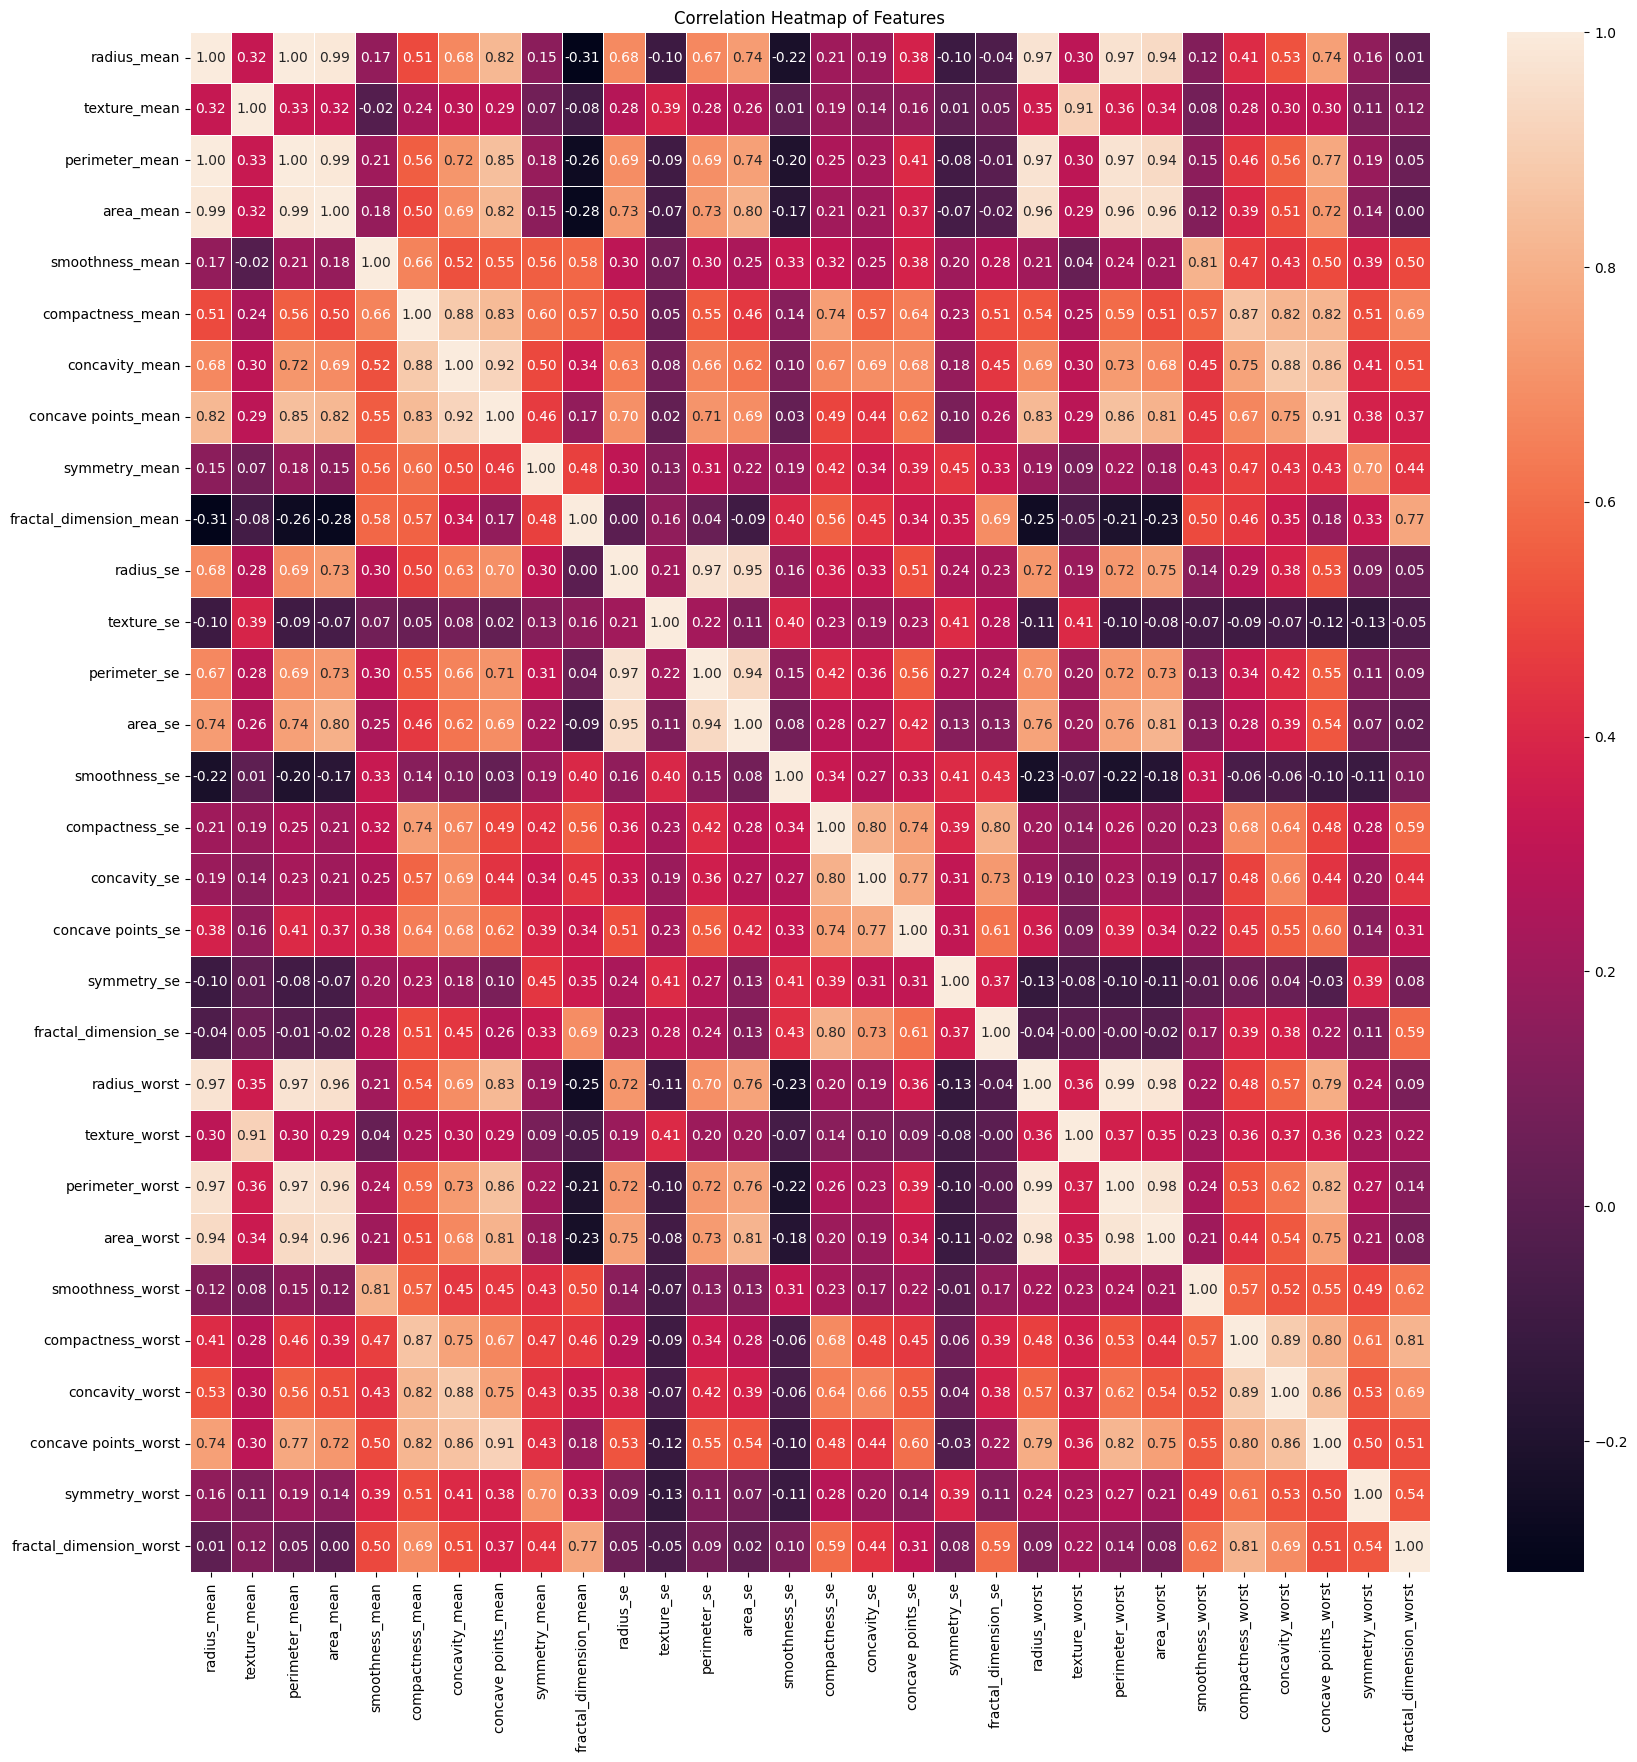

smoothness_se    smoothness_se      1.000000
perimeter_mean   radius_mean        0.997855
radius_worst     perimeter_worst    0.993708
radius_mean      area_mean          0.987357
area_mean        perimeter_mean     0.986507
area_worst       radius_worst       0.984015
perimeter_worst  area_worst         0.977578
perimeter_se     radius_se          0.972794
perimeter_worst  perimeter_mean     0.970387
radius_worst     radius_mean        0.969539
dtype: float64

In [69]:
plt.figure(figsize=(20, 20))
correlation_matrix = cleaned_data.drop(columns=["diagnosis"]).corr()


sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()


correlation_matrix.abs().unstack().sort_values(ascending=False).drop_duplicates().head(
    10
)

#### Correlation of the features with the target


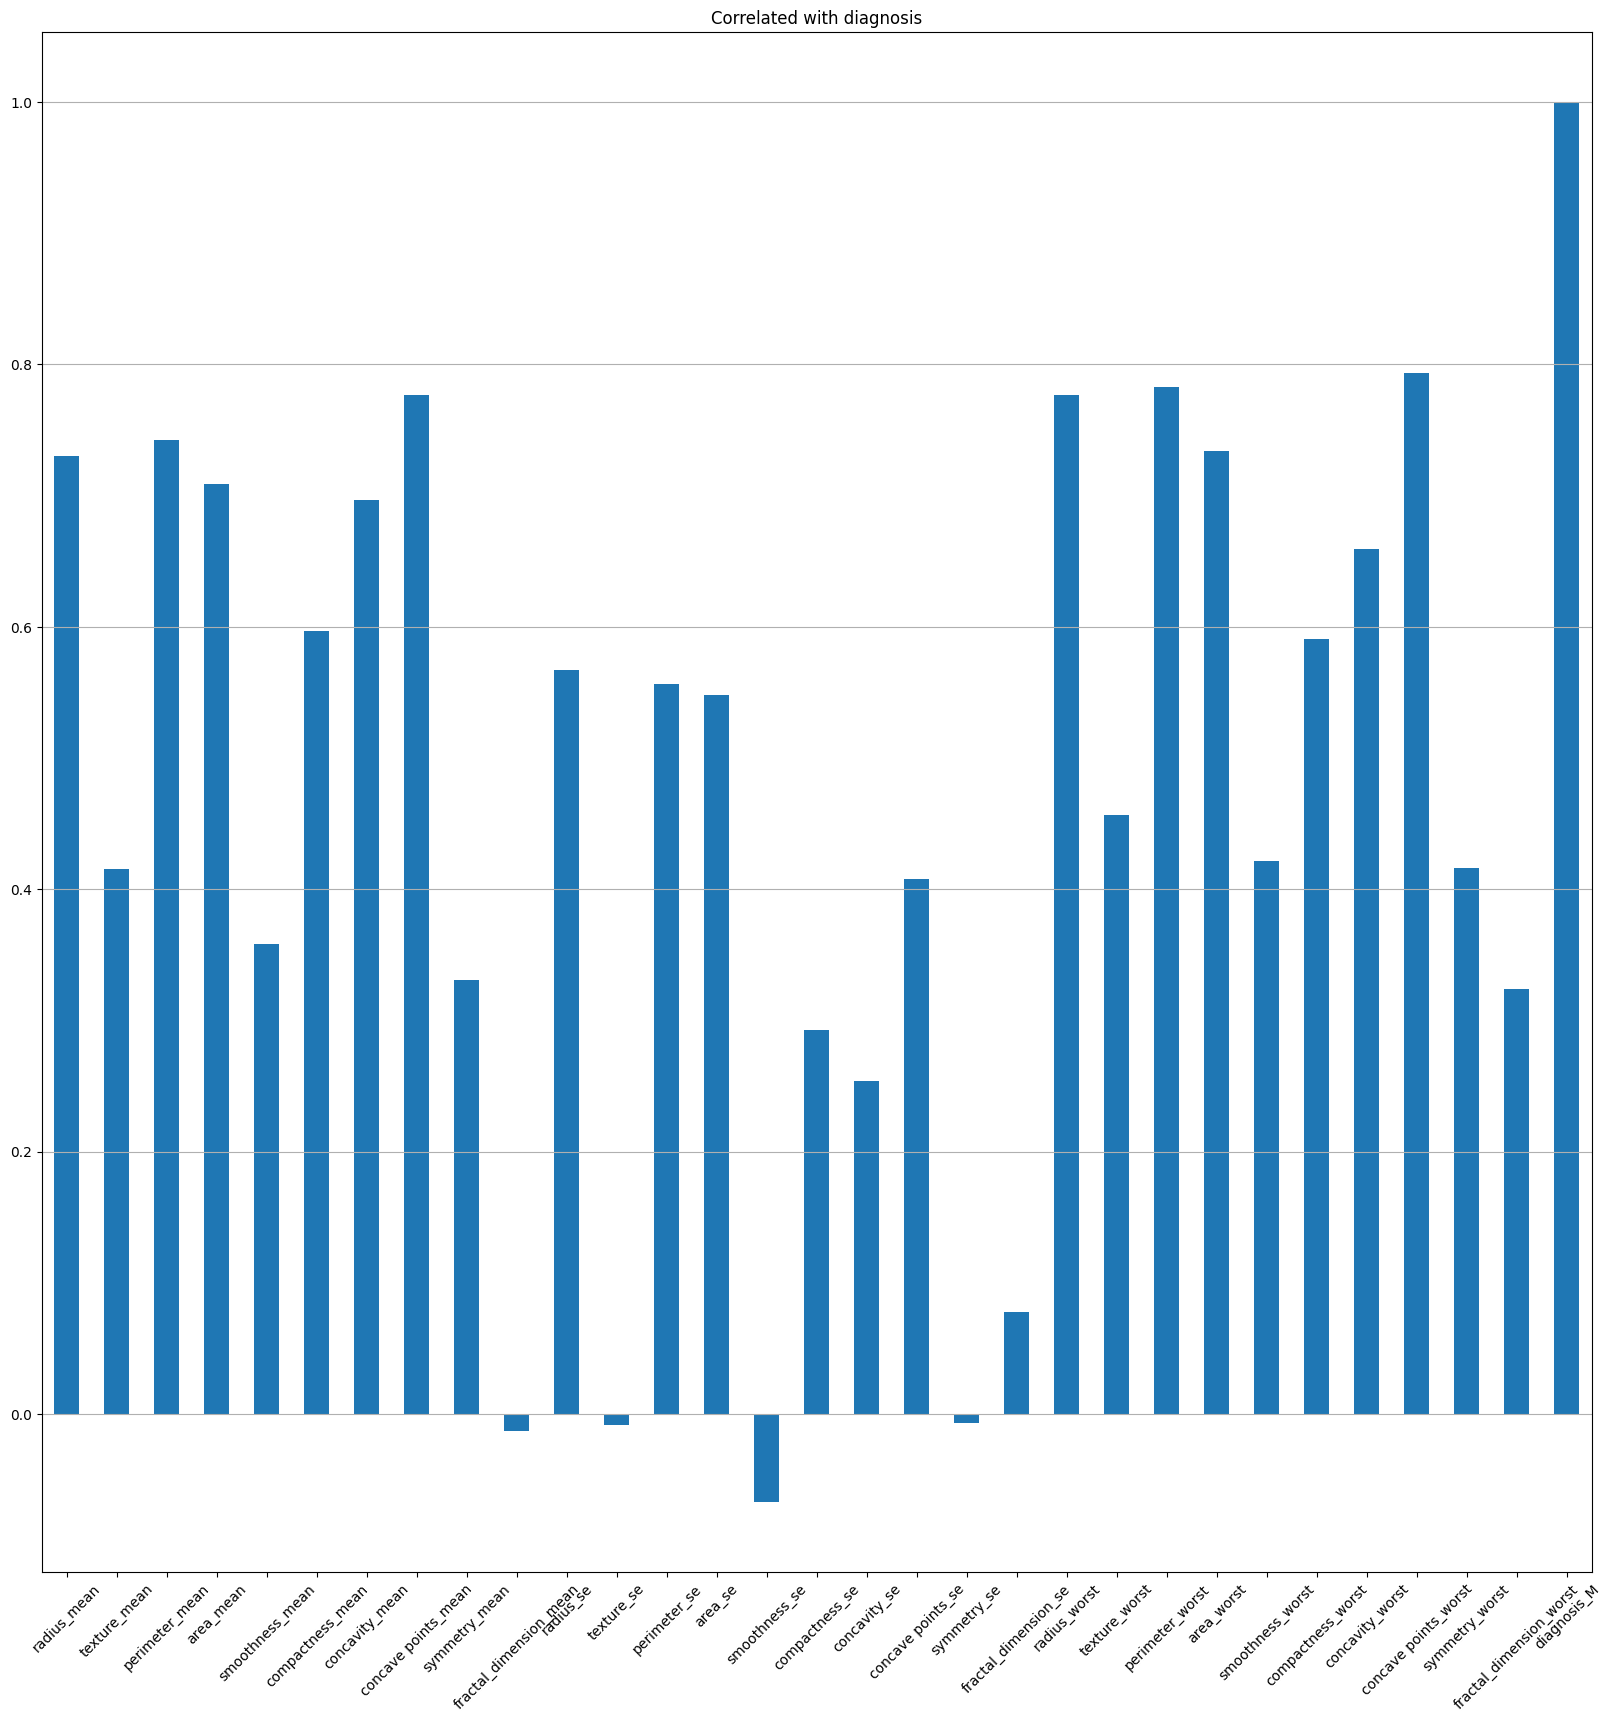

In [70]:
processed_data.corrwith(processed_data["diagnosis_M"]).plot.bar(
    figsize=(20, 20), title="Correlated with diagnosis", rot=45
)
plt.grid(axis="y")

### Splitting the dataset into Features and Labels


In [71]:
X = processed_data.iloc[:, :-1].values
y = processed_data.iloc[:, -1].map({False: 0, True: 1}).values

In [72]:
print(X)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [73]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

### Splitting the dataset into Training set and Test set


In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [75]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (455, 30)
X_test: (114, 30)
y_train: (455,)
y_test: (114,)


## Featuer Scaling


In [76]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [77]:
print(X_train)

[[-1.15036482 -0.39064196 -1.12855021 ... -0.75798367 -0.01614761
  -0.38503402]
 [-0.93798972  0.68051405 -0.94820146 ... -0.60687023  0.09669004
  -0.38615797]
 [ 0.574121   -1.03333557  0.51394098 ... -0.02371948 -0.20050207
  -0.75144254]
 ...
 [-1.32422924 -0.20048168 -1.31754581 ... -0.97974953 -0.71542314
  -0.11978123]
 [-1.24380987 -0.2245526  -1.28007609 ... -1.75401433 -1.58157125
  -1.00601779]
 [-0.73694129  1.14989702 -0.71226578 ... -0.27460457 -1.25895095
   0.21515662]]


In [78]:
print(X_test)

[[-0.20175604  0.3290786  -0.13086754 ...  1.3893291   1.08203284
   1.54029664]
 [-0.25555773  1.46763319 -0.31780437 ... -0.83369364 -0.73131577
  -0.87732522]
 [-0.02619262 -0.8407682  -0.09175081 ... -0.49483785 -1.22080864
  -0.92115937]
 ...
 [ 1.71811488  0.09318356  1.7286186  ...  1.57630515  0.20317063
  -0.15406178]
 [ 1.18859296  0.34352115  1.19333694 ...  0.56019755  0.26991966
  -0.27320074]
 [ 0.26263752 -0.58080224  0.28459338 ... -0.19383705 -1.15564888
   0.11231497]]


## Building the model


### Training the dataset using Logistic Regression model


In [79]:
from sklearn.linear_model import LogisticRegression

classifier_lr = LogisticRegression()

In [80]:
classifier_lr.fit(X_train, y_train)

LogisticRegression()

In [81]:
y_pred = classifier_lr.predict(X_test)

#### Evaluating the prdiction across different metrics on the test set


In [82]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=classifier_lr, X=X_train, y=y_train, cv=10)

acs = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [83]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[65,  2],
       [ 2, 45]])

In [84]:
results = pd.DataFrame(
    [["Logistic Regression", acs, f1, prec, rec]],
    columns=["Model", "Accuracy Score", "F1 Score", "Precision Score", "Recall Score"],
)

In [85]:
results.head()

,Model,Accuracy Score,F1 Score,Precision Score,Recall Score
0,Logistic Regression,0.964912,0.957447,0.957447,0.957447


#### Applying k-Fold Cross Validation


In [86]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=classifier_lr, X=X_train, y=y_train, cv=10)

In [87]:
print("Acccuray: {:.2f}%".format(accuracies.mean() * 100))
print("Standard Devaiation: {:.2f}%".format(accuracies.std() * 100))

Acccuray: 97.81%
Standard Devaiation: 1.98%


### Training the dataset using Random Forest model


In [88]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier()

In [89]:
classifier_rf.fit(X_train, y_train)

RandomForestClassifier()

In [90]:
y_pred = classifier_rf.predict(X_test)

### Evaluating the prdiction across different metrics on the test set


In [91]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=classifier_rf, X=X_train, y=y_train, cv=10)

acs = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [92]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[64,  3],
       [ 2, 45]])

In [93]:
results.loc[len(results)] = ["Random Forest", acs, f1, prec, rec]

In [94]:
results.head()

,Model,Accuracy Score,F1 Score,Precision Score,Recall Score
0,Logistic Regression,0.964912,0.957447,0.957447,0.957447
1,Random Forest,0.956140,0.947368,0.937500,0.957447


### Applying k-Fold Cross Validation


In [95]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=classifier_rf, X=X_train, y=y_train, cv=10)

In [96]:
print("Acccuray: {:.2f}%".format(accuracies.mean() * 100))
print("Standard Devaiation: {:.2f}%".format(accuracies.std() * 100))

Acccuray: 96.28%
Standard Devaiation: 2.95%
